In [1]:
import torch
from torch import nn## nn contain pytorch all building blocks for a neural network
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.4.0+cu121'

# Data Preparation
### Data can be anything
* Image of any kind
* videos
* Audio like songs
* Text
* DNA

In [2]:
weights=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step)#.unsqueeze(dim=1)
y=weights*X+bias
X[:10],y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [3]:
## Spliting data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [31]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="r",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="y",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")
  plt.legend(prop={"size":14})

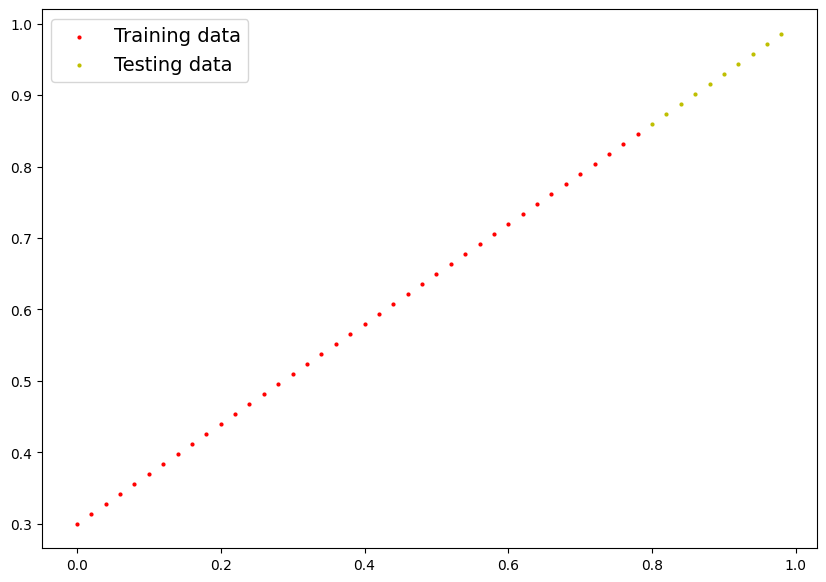

In [5]:
plot_predictions()

# Build Model
Our pytorch model

In [6]:
## Linear Regression
class LinearRegression(nn.Module):## inherit from nn.module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


In [7]:
torch.manual_seed(42)
model_0=LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [9]:
##Make predictions
with torch.inference_mode():#use during making predictions
  y_preds=model_0(X_test)
y_preds

tensor([1.6208, 1.6385, 1.6561, 1.6738, 1.6914, 1.7090, 1.7267, 1.7443, 1.7620,
        1.7796])

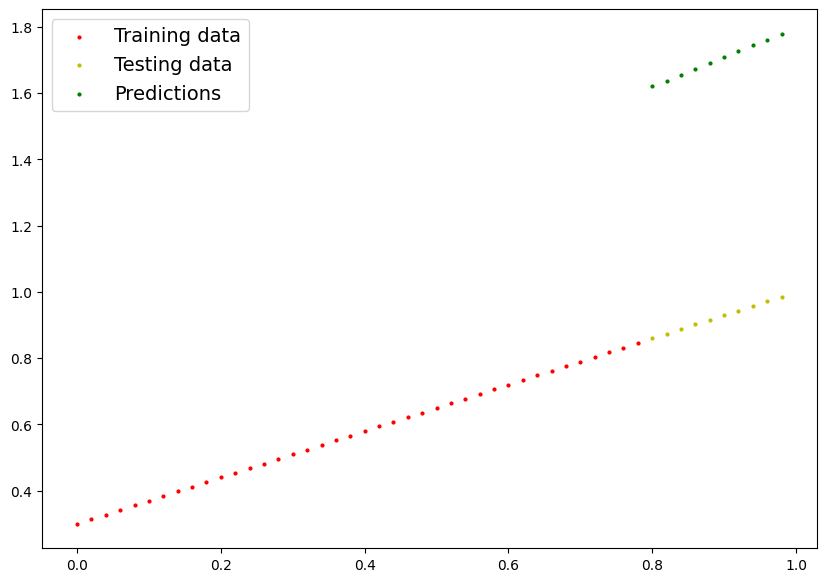

In [10]:
plot_predictions(predictions=y_preds)

In [11]:
##Loss function
loss_fn=nn.L1Loss()
loss=loss_fn(y_preds,y_test)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [34]:
##Training loop and testing loop
epochs=20
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  model_0.train()## Set up training mode
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,y_train)
  print(f"Loss {loss:.4f} for epoch {epoch}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()## Set up testing mode
  with torch.inference_mode():
    epoch_count.append(epoch)
    loss_values.append(loss)

    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
    test_loss_values.append(test_loss)
    print(f"Test loss {test_loss:.2f} for epoch {epoch}")


Loss 0.0071 for epoch 0
Test loss 0.01 for epoch 0
Loss 0.0044 for epoch 1
Test loss 0.01 for epoch 1
Loss 0.0071 for epoch 2
Test loss 0.01 for epoch 2
Loss 0.0044 for epoch 3
Test loss 0.01 for epoch 3
Loss 0.0071 for epoch 4
Test loss 0.01 for epoch 4
Loss 0.0044 for epoch 5
Test loss 0.01 for epoch 5
Loss 0.0071 for epoch 6
Test loss 0.01 for epoch 6
Loss 0.0044 for epoch 7
Test loss 0.01 for epoch 7
Loss 0.0071 for epoch 8
Test loss 0.01 for epoch 8
Loss 0.0044 for epoch 9
Test loss 0.01 for epoch 9
Loss 0.0071 for epoch 10
Test loss 0.01 for epoch 10
Loss 0.0044 for epoch 11
Test loss 0.01 for epoch 11
Loss 0.0071 for epoch 12
Test loss 0.01 for epoch 12
Loss 0.0044 for epoch 13
Test loss 0.01 for epoch 13
Loss 0.0071 for epoch 14
Test loss 0.01 for epoch 14
Loss 0.0044 for epoch 15
Test loss 0.01 for epoch 15
Loss 0.0071 for epoch 16
Test loss 0.01 for epoch 16
Loss 0.0044 for epoch 17
Test loss 0.01 for epoch 17
Loss 0.0071 for epoch 18
Test loss 0.01 for epoch 18
Loss 0.0044 f

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [25]:
##Make predictions
with torch.inference_mode():#use during making predictions
  y_preds=model_0(X_test)
y_preds

tensor([0.8661, 0.8801, 0.8940, 0.9080, 0.9220, 0.9359, 0.9499, 0.9638, 0.9778,
        0.9917])

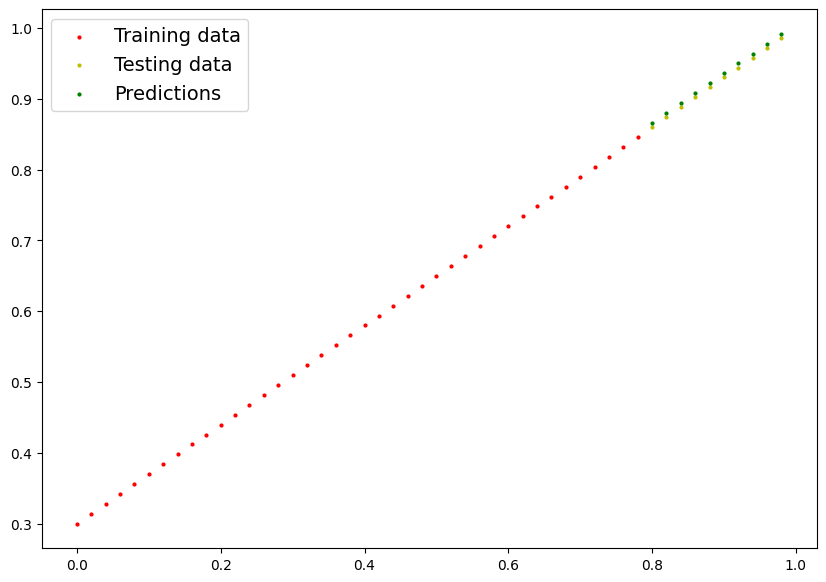

In [26]:
plot_predictions(predictions=y_preds)

# Save model in pytorch

In [36]:
# saving model
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name='model.pth'
model_save_path=model_path/model_name
torch.save(obj=model_0.state_dict(),f=model_save_path)


In [37]:
##Load model
loaded_model=LinearRegression()
loaded_model.load_state_dict(torch.load(f=model_save_path))

<ipython-input-37-0ae429bab922>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [38]:
#make prediction
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test)
loaded_model_preds

tensor([0.8661, 0.8801, 0.8940, 0.9080, 0.9220, 0.9359, 0.9499, 0.9638, 0.9778,
        0.9917])

# All together

In [49]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.4.0+cu121'

In [50]:
## Device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [51]:
## Create data
weights=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weights*X+bias

In [52]:
##split data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [53]:
import torch
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1, out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [54]:
torch.manual_seed(42)
model_0=LinearRegression()
print(model_0.state_dict())
model_0.to(device)

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [55]:
torch.manual_seed(42)
loss_fn=nn.L1Loss()
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)
epochs=200
for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch {epoch} loss {loss:.4f} test loss {test_loss:.4f}")

Epoch 0 loss 0.5552 test loss 0.5740
Epoch 10 loss 0.4400 test loss 0.4393
Epoch 20 loss 0.3248 test loss 0.3046
Epoch 30 loss 0.2095 test loss 0.1698
Epoch 40 loss 0.0943 test loss 0.0351
Epoch 50 loss 0.0239 test loss 0.0478
Epoch 60 loss 0.0200 test loss 0.0458
Epoch 70 loss 0.0165 test loss 0.0375
Epoch 80 loss 0.0131 test loss 0.0299
Epoch 90 loss 0.0097 test loss 0.0217
Epoch 100 loss 0.0062 test loss 0.0141
Epoch 110 loss 0.0028 test loss 0.0058
Epoch 120 loss 0.0013 test loss 0.0138
Epoch 130 loss 0.0013 test loss 0.0138
Epoch 140 loss 0.0013 test loss 0.0138
Epoch 150 loss 0.0013 test loss 0.0138
Epoch 160 loss 0.0013 test loss 0.0138
Epoch 170 loss 0.0013 test loss 0.0138
Epoch 180 loss 0.0013 test loss 0.0138
Epoch 190 loss 0.0013 test loss 0.0138


In [56]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [57]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

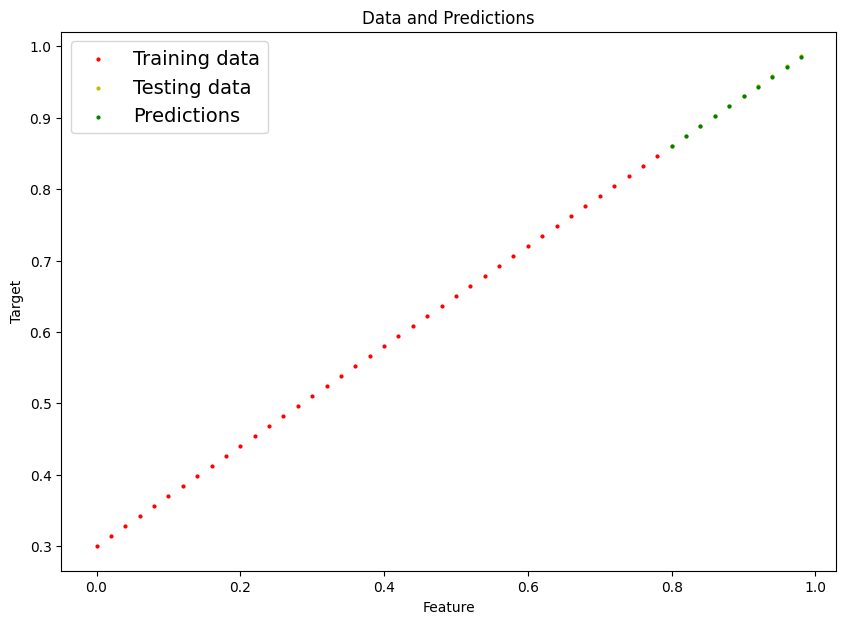

In [58]:
import torch
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plot training data, testing data, and predictions.

    Args:
        train_data (numpy.ndarray): Features of the training data.
        train_labels (numpy.ndarray): Labels of the training data.
        test_data (numpy.ndarray): Features of the testing data.
        test_labels (numpy.ndarray): Labels of the testing data.
        predictions (numpy.ndarray, optional): Predicted values for the testing data.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="r", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('Data and Predictions')
    plt.legend(prop={"size": 14})
    plt.show()

def move_to_cpu_and_convert(tensor):
    """
    Move tensor to CPU and convert it to a NumPy array.

    Args:
        tensor (torch.Tensor): Tensor to be moved to CPU and converted.

    Returns:
        numpy.ndarray: Converted NumPy array.
    """
    return tensor.cpu().detach().numpy()
# Move tensors to CPU and convert to NumPy
X_train_np = move_to_cpu_and_convert(X_train)
y_train_np = move_to_cpu_and_convert(y_train)
X_test_np = move_to_cpu_and_convert(X_test)
y_test_np = move_to_cpu_and_convert(y_test)
y_preds_np = move_to_cpu_and_convert(y_preds)

# Flatten arrays if necessary
X_train_np = X_train_np.flatten()
X_test_np = X_test_np.flatten()

# Plot predictions
plot_predictions(train_data=X_train_np,
                  train_labels=y_train_np,
                  test_data=X_test_np,
                  test_labels=y_test_np,
                  predictions=y_preds_np)


In [59]:
## Saving model
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [60]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [61]:
loaded_model=LinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-61-2ba701fa5d16>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [62]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [64]:
loaded_model.to(device)
with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test.to(device))
loaded_model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [48]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]], device='cuda:0')